## Assignment 1 -

Using table PRIS113 from Denmark Statistics produce figures with, respectively,
1. The consumer price index (CPI), Pt, indexed to 100 on average in 2020
2. The month-to-month inflation rate, πt = Pt/Pt−1 − 1
3. The 12-month inflation rate, π
12
t = Pt/Pt−12 − 1
When did the post-pandemic inflation surge end in Denmark?


In [52]:
pip install git+https://github.com/alemartinello/dstapi.git


  Cloning https://github.com/alemartinello/dstapi.git to c:\users\madsj\appdata\local\temp\pip-req-build-k1ma4nk1
  Resolved https://github.com/alemartinello/dstapi.git to commit d9eeb5a82cbc70b7d63b2ff44d92632fd77123a4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/alemartinello/dstapi.git 'C:\Users\madsj\AppData\Local\Temp\pip-req-build-k1ma4nk1'


In [2]:
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})

from dstapi import DstApi

In [ ]:
# Define column mapping
columns_dict = {}
columns_dict['TYPE'] = 'variable'
columns_dict['TID'] = 'month'
columns_dict['INDHOLD'] = 'value'

Pulling the data. 

In [ ]:
# Get data from PRIS113 (Consumer Price Index)
pris113_api = DstApi('PRIS113')

# Define base parameters
params = pris113_api._define_base_params(language='en')
#show parameters
display(params)
pris113 = pris113_api.get_data(params)

#show shape and head
print (pris113.shape)
display(pris113.head())

{'table': 'pris113',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TYPE', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

(549, 3)


,TYPE,TID,INDHOLD
0,Consumer price index,1980M01,33.0
1,Consumer price index,1980M05,34.5
2,Consumer price index,1980M09,35.5
3,Consumer price index,1981M01,36.5
4,Consumer price index,1981M05,38.6


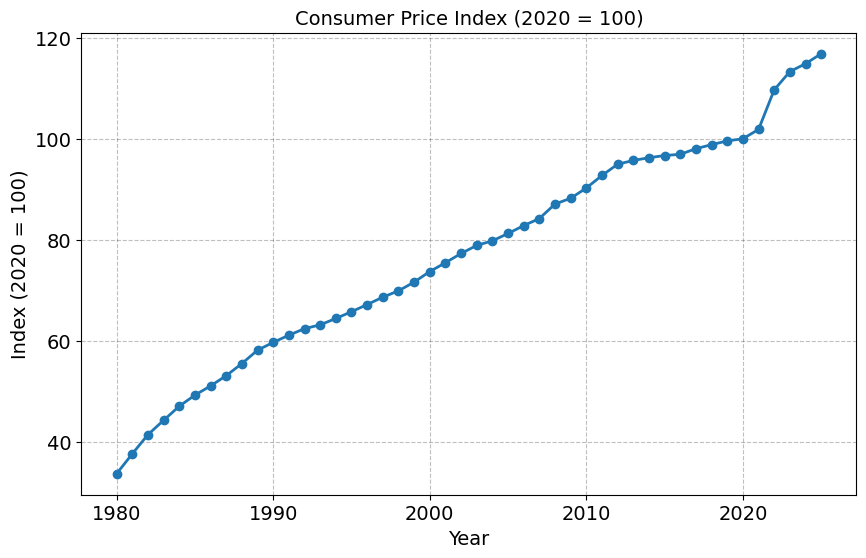

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure INDHOLD is numeric and extract year from TID
pris113['INDHOLD'] = pris113['INDHOLD'].astype(float)
pris113['year'] = pris113['TID'].str.slice(0, 4).astype(int)

# Compute yearly average CPI
pris113_yearly = pris113.groupby('year', as_index=False)['INDHOLD'].mean()

# Normalize to 2020 = 100
base_value = pris113_yearly.loc[pris113_yearly['year'] == 2020, 'INDHOLD'].values[0]
pris113_yearly['index_2020'] = pris113_yearly['INDHOLD'] / base_value * 100

# Calculate annual inflation rate (nice to have)
pris113_yearly['inflation_rate'] = pris113_yearly['INDHOLD'].pct_change() * 100

# Plot the index (2020 = 100)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(pris113_yearly['year'], pris113_yearly['index_2020'], marker='o', linewidth=2)
ax.set_title('Consumer Price Index (2020 = 100)', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Index (2020 = 100)')
ax.grid(True)

plt.show()


In [63]:
#pris113['month'] = pris113['TID'].str[-2:]
#pris113['month'].value_counts().sort_index()


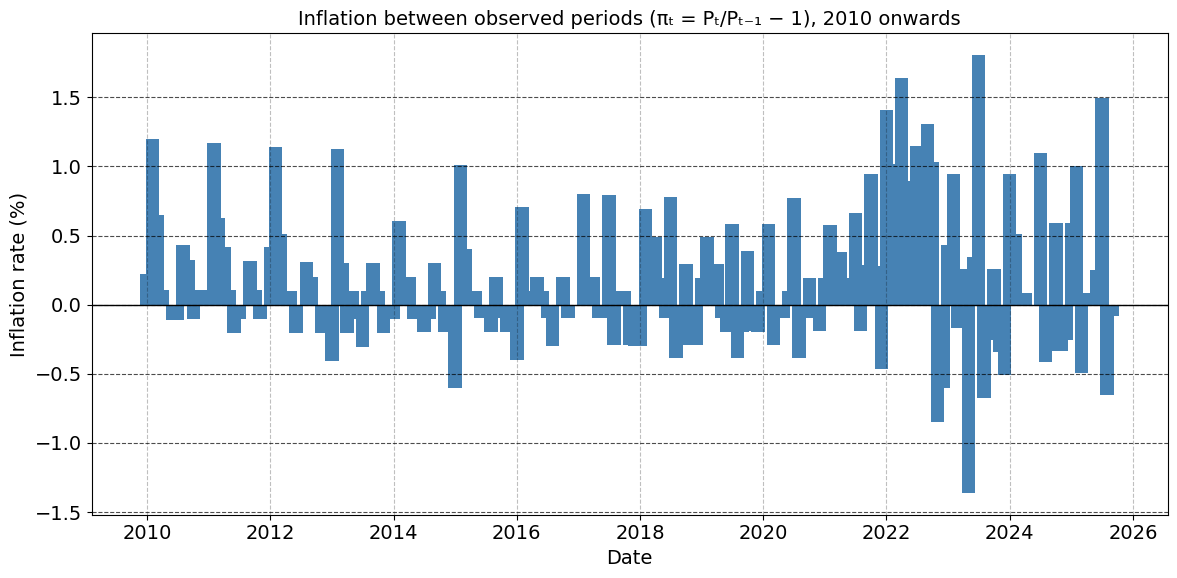

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert data
pris113['INDHOLD'] = pris113['INDHOLD'].astype(float)
pris113 = pris113.sort_values('TID')

# Create date column (1980M02 → 1980-02)
pris113['date'] = pd.to_datetime(pris113['TID'].str.replace('M', '-'), format='%Y-%m')

# Compute period-to-period inflation
pris113['inflation'] = pris113['INDHOLD'].pct_change() * 100  # in %

# Filter from 2010 onward
pris113_post2010 = pris113[pris113['date'].dt.year >= 2010]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(pris113_post2010['date'], pris113_post2010['inflation'], color='steelblue', width=80)
ax.axhline(0, color='black', linewidth=1)

ax.set_title('Inflation between observed periods (πₜ = Pₜ/Pₜ₋₁ − 1), 2010 onwards', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Inflation rate (%)')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


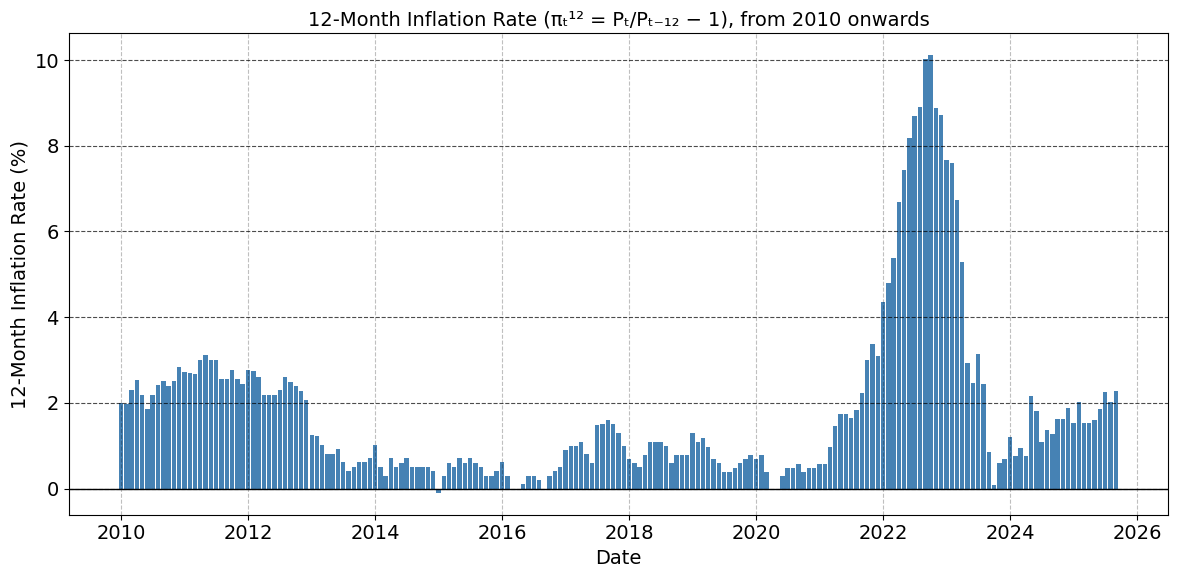

In [9]:
# Compute 12-month (year-over-year) inflation
# Ensure numeric CPI values and proper sorting
pris113['INDHOLD'] = pris113['INDHOLD'].astype(float)
pris113 = pris113.sort_values('TID')

# Convert "1980M02" → proper datetime "1980-02"
pris113['date'] = pd.to_datetime(pris113['TID'].str.replace('M', '-'), format='%Y-%m')

# Compute 12-month (year-over-year) inflation
pris113['inflation_12m'] = (pris113['INDHOLD'] / pris113['INDHOLD'].shift(12) - 1) * 100

# Filter from 2010 onward
pris113_post2010 = pris113[pris113['date'].dt.year >= 2010]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(pris113_post2010['date'], pris113_post2010['inflation_12m'], color='steelblue', width=25)
ax.axhline(0, color='black', linewidth=1)

ax.set_title('12-Month Inflation Rate (πₜ¹² = Pₜ/Pₜ₋₁₂ − 1), from 2010 onwards', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('12-Month Inflation Rate (%)')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Assignment 1.2 





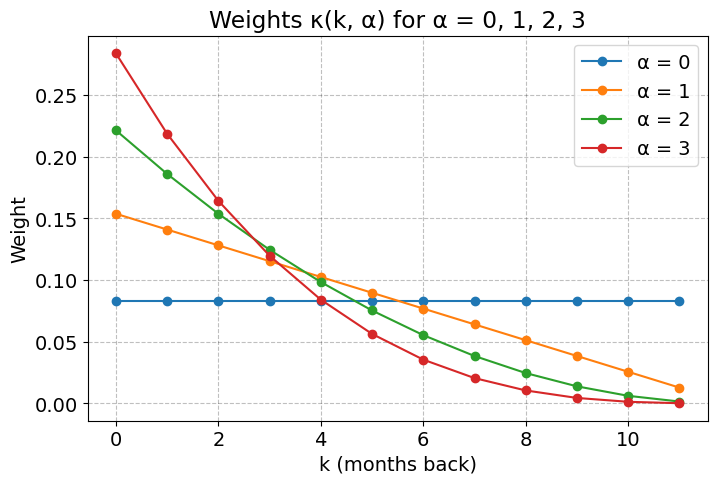

In [10]:
#instentaneous inflation

T = 12
k = np.arange(12)
alphas = [0, 1, 2, 3]

plt.figure(figsize=(8,5))
for a in alphas:
    kappa = (T - k)**a / np.sum((T - k)**a)
    plt.plot(k, kappa, marker='o', label=f'α = {a}')

plt.title('Weights κ(k, α) for α = 0, 1, 2, 3')
plt.xlabel('k (months back)')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
#using the .rolling(12).apply method, I will calculate the instentaneous 
# inflation with alpha = 1-12. 

def instantaneous_inflation(series, alpha):
    T = len(series)
    if series.isna().any():
        return np.nan
    k = np.arange(T)
    weights = (T - k)**alpha
    weights /= weights.sum()  # normalize weights
    return np.prod((1 + series.values)**weights) - 1


## 1.3 - Kerneinflation 

In [10]:
# df = PRIS111-dataframe efter rensning, med kolonner: ['group','time','value','date', ...]
# (brug din eksisterende df fra før; vi starter fra df der allerede har 'date' og numeric 'value')

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dstapi import DstApi


# Get data from PRIS111 (Consumer Price Index - detailed)
pris111_api = DstApi('PRIS111')

#show shape and head
print (pris111.shape)
display(pris111.head())

params = pris111_api._define_base_params(language='en')
display(params)
pris111 = pris111_api.get_data(params)



#see unique values in various columns
print(pris111['ENHED'].unique()) 
print(pris111['VAREGR'].unique())

(343035, 4)


,VAREGR,ENHED,TID,INDHOLD
0,04.4.4.2 Security services,Index,2001M01,..
1,04.4.4.2 Security services,Percentage change compared to previous month (...,2001M01,..
2,04.4.4.2 Security services,Percentage change compared to same month the y...,2001M01,..
3,04.4.4.9 Other services related to dwelling,Index,2001M01,..
4,04.4.4.9 Other services related to dwelling,Percentage change compared to previous month (...,2001M01,..


{'table': 'pris111',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'VAREGR', 'values': ['*']},
  {'code': 'ENHED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

['Index' 'Percentage change compared to previous month (per cent)'
 'Percentage change compared to same month the year before (per cent)']
['04.4.4.2 Security services'
 '04.4.4.9 Other services related to dwelling'
 '04.5 Electricity, gas and other fuels' '04.5.1 Electricity' '04.5.2 Gas'
 '04.5.2.1 Natural gas and town gas'
 '04.5.2.2 Liquefied hydrocarbons (butane, propane, etc.)'
 '04.5.3 Liquid fuels' '04.5.4 Solid fuels' '04.5.4.1 Coal'
 '04.5.4.9 Other solid fuels' '04.5.5 Heat energy'
 '05. Furnishings, household equipment and routine household maintenance '
 '05.1 Furniture and furnishings, carpets and other floor coverings'
 '05.1.1 Furniture and furnishings' '05.1.1.1 Household furniture'
 '05.1.1.2 Garden furniture' '05.1.1.3 Lighting equipment'
 '05.1.1.9 Other furniture and furnishings'
 '05.1.2 Carpets and other floor coverings' '05.1.2.1 Carpets and rugs'
 '05.1.2.2 Other floor coverings'
 '05.1.2.3 Services of laying of fitted carpets and floor coverings'
 '05.1.3 Repa

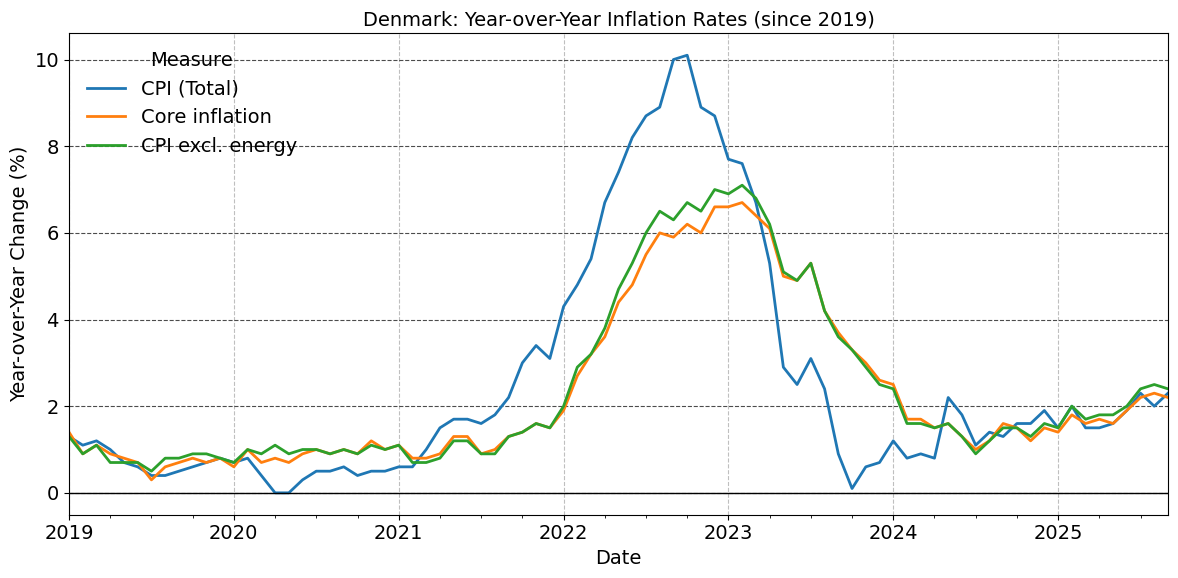

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define filters (relevant groups and unit)
target_unit = "Percentage change compared to same month the year before (per cent)"
groups = [
    "00 Consumer price index, total",
    "15.1 Overall Consumer Price Index excl. energy",
    "14.1 Overall Consumer Price Index - excl. energy and unprocessed food (core inflation)",
]

# using the filters
df = pris111.loc[
    (pris111["ENHED"] == target_unit) & (pris111["VAREGR"].isin(groups)),
    ["TID", "VAREGR", "INDHOLD"]
].copy()

# Convert to numeric & datetime 
df["INDHOLD"] = pd.to_numeric(df["INDHOLD"], errors="coerce")
df["date"] = pd.to_datetime(df["TID"].str.replace("M", "-"), format="%Y-%m", errors="coerce")

# --- Aggregate if duplicates ---
#df = df.groupby(["date", "VAREGR"], as_index=False)["INDHOLD"].mean()

# Pivot to wide format 
wide = (
    df.pivot(index="date", columns="VAREGR", values="INDHOLD")
      .sort_index()
      .loc["2019-01-01":]
)

# Rename for cleaner legend labels ---
name_map = {
    "00 Consumer price index, total": "CPI (Total)",
    "15.1 Overall Consumer Price Index excl. energy": "CPI excl. energy",
    "14.1 Overall Consumer Price Index - excl. energy and unprocessed food (core inflation)": "Core inflation",
}
wide = wide.rename(columns=name_map) #applying the rename

# Plot 
fig, ax = plt.subplots(figsize=(12, 6))
wide.plot(ax=ax, linewidth=2)
ax.axhline(0, color="black", linewidth=1)
ax.set_title("Denmark: Year-over-Year Inflation Rates (since 2019)", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Year-over-Year Change (%)")
ax.legend(title="Measure", loc="upper left", frameon=False)
ax.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


**Comments on the figure** :

Using the PRIS111 table from Statistics Denmark, we can decompose inflation into several distinct groups. This allows us to separate the effects of energy and food prices from what is often referred to as core inflation.

The figure above displays the annual growth rate of overall inflation, inflation excluding energy, and inflation excluding both energy and food. The figure shows that particular energy has been a driving factor in the large inflation we experienced towards the end of 2022. 


## Question 1.4 -  Disaggregated inflation in Denmark



In [ ]:
#Tag den her
#Step 1:
# Inspect the category levels
levels = DstApi('PRIS111').variable_levels('VAREGR', language='en')

# Print all categories
for row in levels.itertuples():
    print(row.id, "-", row.text)

000000 - 00 Consumer price index, total
010000 - 01 Food and non-alcoholic beverages
011000 - 01.1 Food
011100 - 01.1.1 Bread and cereals
011110 - 01.1.1.1 Rice
011120 - 01.1.1.2 Flours and other cereals
011130 - 01.1.1.3 Bread
011140 - 01.1.1.4 Other bakery products
011150 - 01.1.1.5 Pizza and quiche
011160 - 01.1.1.6 Pasta products and couscous
011170 - 01.1.1.7 Breakfast cereals
011180 - 01.1.1.8 Other cereal products
011200 - 01.1.2 Meat
011210 - 01.1.2.1 Beef and veal
011220 - 01.1.2.2 Pork
011230 - 01.1.2.3 Lamb and goat
011240 - 01.1.2.4 Poultry
011260 - 01.1.2.6 Edible offal
011270 - 01.1.2.7 Dried, salted or smoked meat
011280 - 01.1.2.8 Other meat preparations
011300 - 01.1.3 Fish and seafood
011310 - 01.1.3.1 Fresh or chilled fish
011320 - 01.1.3.2 Frozen fish
011340 - 01.1.3.4 Frozen seafood
011350 - 01.1.3.5 Dried, smoked or salted fish and seafood
011360 - 01.1.3.6 Other preserved or processed fish and seafood-based preparations
011400 - 01.1.4 Milk, cheese and eggs
01141

Since we see that we can pull the four-digit group of oods by filtering on the amount of digits in row_text: 

In [50]:
#tag den her
# We extract the numeric part from 'text' (before the first space)
levels['numcode'] = levels['text'].str.extract(r'^([\d\.]+)')

# Remove dots and count digits
levels['numcode_clean'] = levels['numcode'].str.replace('.', '', regex=False)

# Keep only those with 4 digits
filtered = levels[levels['numcode_clean'].str.len() == 4]

# Print the result
for row in filtered.itertuples():
    print(row.id, "-", row.text)

011100 - 01.1.1 Bread and cereals
011200 - 01.1.2 Meat
011300 - 01.1.3 Fish and seafood
011400 - 01.1.4 Milk, cheese and eggs
011500 - 01.1.5 Oils and fats
011600 - 01.1.6 Fruit
011700 - 01.1.7 Vegetables
011800 - 01.1.8 Sugar, jam, honey, chocolate and confectionery
011900 - 01.1.9 Food products n.e.c.
012100 - 01.2.1 Coffee, tea and cocoa
012200 - 01.2.2 Mineral waters, soft drinks, fruit and vegetable juices
021100 - 02.1.1 Spirits
021200 - 02.1.2 Wine
021300 - 02.1.3 Beer
031100 - 03.1.1 Clothing materials
031200 - 03.1.2 Garments
031300 - 03.1.3 Other articles of clothing and clothing accessories
031400 - 03.1.4 Cleaning, repair and hire of clothing
032100 - 03.2.1 Shoes and other footwear
032200 - 03.2.2 Repair and hire of footwear
041100 - 04.1.1 Actual rentals paid by tenants
041200 - 04.1.2 Other actual rentals
042100 - 04.2.1 Imputed rentals of owner-occupiers
042200 - 04.2.2 Other imputed rentals
043100 - 04.3.1 Materials for the maintenance and repair of the dwelling
043200

In [ ]:
import re
import pandas as pd


#Tag den her

# --- metadata for canonical names at 01.1.1 level (optional but nice) ---
levels = DstApi('PRIS111').variable_levels('VAREGR', language='en').copy()
names_3seg = (
    levels['text']
      .str.extract(r'^(?P<code3>\d{2}\.\d\.\d)\s+(?P<name3>.+)$')
      .dropna()
      .drop_duplicates()
)

# --- prices ---
prices = pris111[pris111['ENHED'] == 'Index'].copy()

# Keep ONLY rows where VAREGR is EXACTLY three segments: "01.1.1 <name>"
exact_3seg = prices['VAREGR'].str.match(r'^\d{2}\.\d\.\d\s')
prices = prices.loc[exact_3seg].copy()

# Extract code + (raw) name from VAREGR
m = prices['VAREGR'].str.extract(r'^(?P<code3>\d{2}\.\d\.\d)\s+(?P<name_raw>.+)$')
prices = pd.concat([prices, m], axis=1)   # avoids the "columns overlap" join error

# Parse value and date
prices['INDHOLD'] = pd.to_numeric(prices['INDHOLD'].astype(str).str.replace(',', '.'), errors='coerce')
prices['date'] = pd.to_datetime(prices['TID'].str.replace('M', '-'), format='%Y-%m', errors='coerce')

# Drop rows without value/date
prices = prices.dropna(subset=['INDHOLD', 'date'])

# Attach canonical name (if available)
prices = prices.merge(names_3seg, on='code3', how='left')
prices['name'] = prices['name3'].fillna(prices['name_raw'])
prices = prices.drop(columns=['name3'])

# Sanity checks (should be zero)
#   multiple rows per (date, code3)?
dupes = prices.duplicated(['date', 'code3'], keep=False).sum()
#   any NaNs left in INDHOLD?
n_nans = prices['INDHOLD'].isna().sum()

print(f"Duplicated (date, code3) rows: {dupes}")
print(f"NaNs in INDHOLD: {n_nans}")

# Sort and preview
prices = prices.sort_values(['date', 'code3'])
print(prices[['date', 'code3', 'name', 'INDHOLD']].head(12))



Duplicated (date, code3) rows: 0
NaNs in INDHOLD: 0
         date   code3                                               name  \
44 2001-01-01  01.1.1                                  Bread and cereals   
45 2001-01-01  01.1.2                                               Meat   
46 2001-01-01  01.1.3                                   Fish and seafood   
47 2001-01-01  01.1.4                              Milk, cheese and eggs   
48 2001-01-01  01.1.5                                      Oils and fats   
49 2001-01-01  01.1.6                                              Fruit   
50 2001-01-01  01.1.7                                         Vegetables   
51 2001-01-01  01.1.8     Sugar, jam, honey, chocolate and confectionery   
52 2001-01-01  01.1.9                               Food products n.e.c.   
53 2001-01-01  01.2.1                              Coffee, tea and cocoa   
54 2001-01-01  01.2.2  Mineral waters, soft drinks, fruit and vegetab...   
55 2001-01-01  02.1.1               

In [ ]:
#Tag den her
# Compute 12-month percent change (YoY inflation)
prices['infl_12m'] = prices.groupby('code3')['INDHOLD'].pct_change(12) * 100

# Drop rows without inflation value
prices = prices.dropna(subset=['infl_12m'])

#preview 
print(prices[['date','code3','name','INDHOLD','infl_12m']].head(12))


            date   code3                                               name  \
18936 2002-01-01  01.1.1                                  Bread and cereals   
18937 2002-01-01  01.1.2                                               Meat   
18938 2002-01-01  01.1.3                                   Fish and seafood   
18939 2002-01-01  01.1.4                              Milk, cheese and eggs   
18940 2002-01-01  01.1.5                                      Oils and fats   
18941 2002-01-01  01.1.6                                              Fruit   
18942 2002-01-01  01.1.7                                         Vegetables   
18943 2002-01-01  01.1.8     Sugar, jam, honey, chocolate and confectionery   
18944 2002-01-01  01.1.9                               Food products n.e.c.   
18945 2002-01-01  01.2.1                              Coffee, tea and cocoa   
18946 2002-01-01  01.2.2  Mineral waters, soft drinks, fruit and vegetab...   
18947 2002-01-01  02.1.1                            

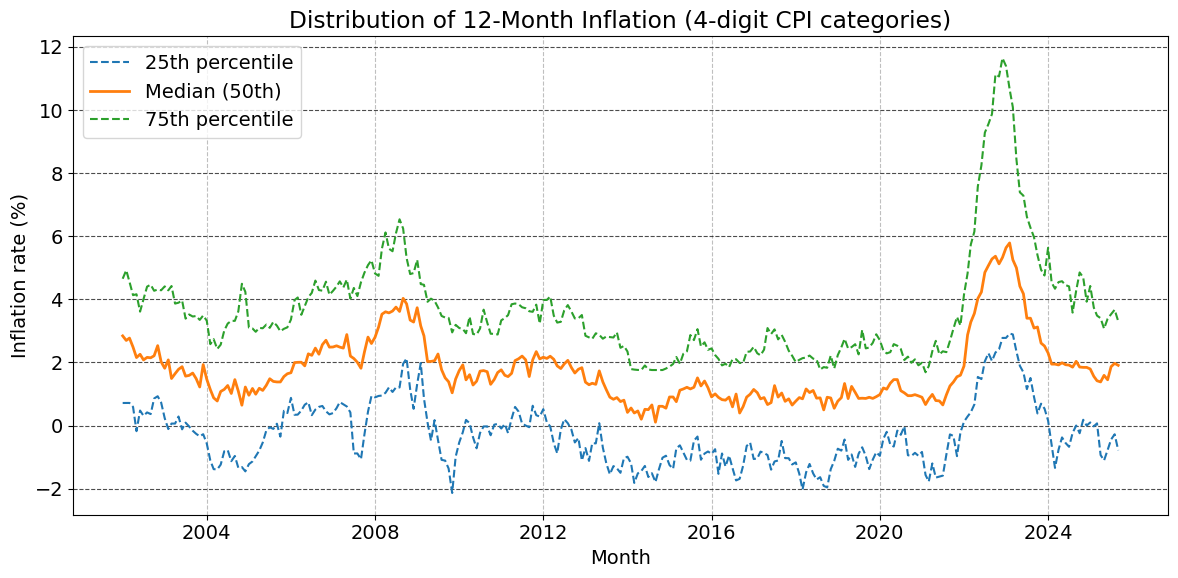

In [ ]:

# Tag den her
# Group by date and compute distribution percentiles
summary = (
    prices.groupby('date')['infl_12m']
          .agg(
              p25=lambda x: x.quantile(0.25),
              p50=lambda x: x.quantile(0.50),
              p75=lambda x: x.quantile(0.75)
          )
          .reset_index()
)


fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summary['date'], summary['p25'], linestyle='--', label='25th percentile')
ax.plot(summary['date'], summary['p50'], linewidth=2, label='Median (50th)')
ax.plot(summary['date'], summary['p75'], linestyle='--', label='75th percentile')

ax.set_title('Distribution of 12-Month Inflation (4-digit CPI categories)')
ax.set_xlabel('Month')
ax.set_ylabel('Inflation rate (%)')
ax.legend()
ax.grid(True, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

## 1.4.3 - Plot histogram



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#tag den her

# Ensure we only use the relevant window
start, end = "2020-08-01", "2025-08-01"

# Get price levels for those months
df_2020 = prices.loc[prices['date'] == start, ['code3', 'INDHOLD']].rename(columns={'INDHOLD': 'p_2020'})
df_2025 = prices.loc[prices['date'] == end,   ['code3', 'INDHOLD']].rename(columns={'INDHOLD': 'p_2025'})

# Merge and compute percent change
change = (
    df_2020.merge(df_2025, on='code3', how='inner')
           .assign(pct_change=lambda d: (d['p_2025'] / d['p_2020'] - 1) * 100)
           .dropna(subset=['pct_change'])
)


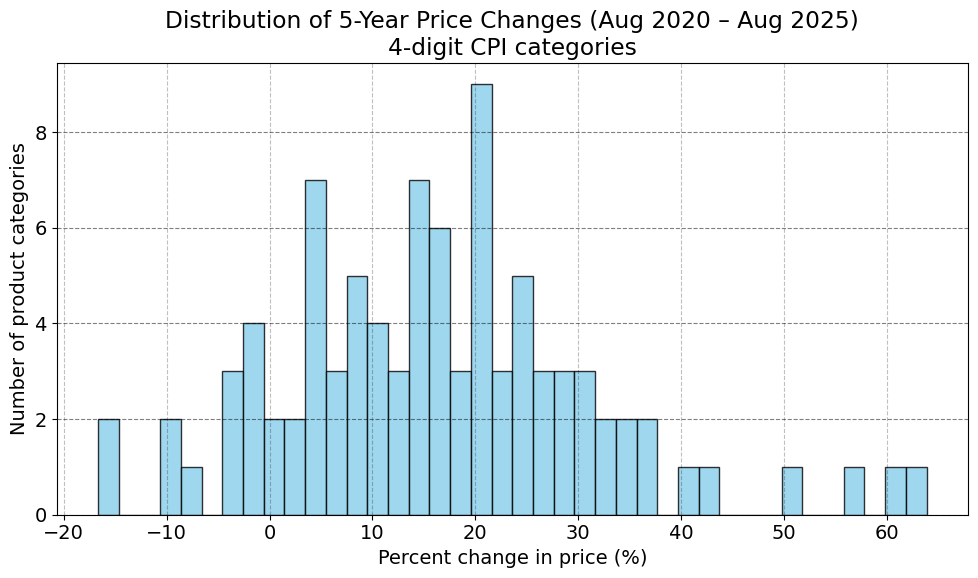

In [ ]:
#tag den her
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(change['pct_change'], bins=40, color='skyblue', edgecolor='black', alpha=0.8)

ax.set_title('Distribution of 5-Year Price Changes (Aug 2020 – Aug 2025)\n4-digit CPI categories')
ax.set_xlabel('Percent change in price (%)')
ax.set_ylabel('Number of product categories')
ax.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()


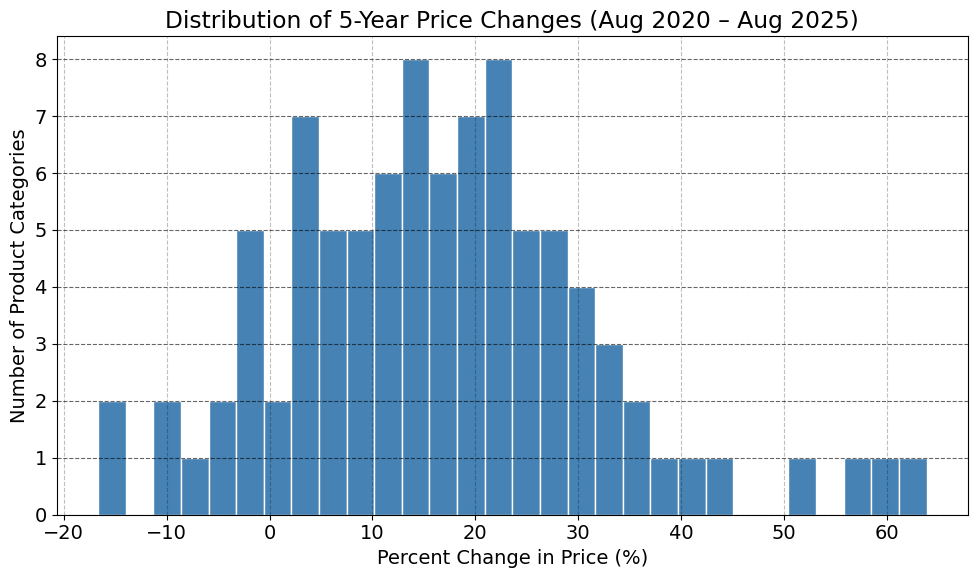

In [ ]:
#tag ikke den her
start, end = "2020-08-01", "2025-08-01"

p2020 = prices.loc[prices['date'] == start, ['code3','INDHOLD']].rename(columns={'INDHOLD':'p2020'})
p2025 = prices.loc[prices['date'] == end,   ['code3','INDHOLD']].rename(columns={'INDHOLD':'p2025'})

change = (
    p2020.merge(p2025, on='code3', how='inner')
         .assign(pct_change=lambda d: (d['p2025']/d['p2020'] - 1)*100)
         .dropna(subset=['pct_change'])
)

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(change['pct_change'], bins=30, color='steelblue', edgecolor='white')
ax.set_title('Distribution of 5-Year Price Changes (Aug 2020 – Aug 2025)')
ax.set_xlabel('Percent Change in Price (%)')
ax.set_ylabel('Number of Product Categories')
ax.grid(axis='y', alpha=0.6)
plt.tight_layout()
plt.show()


In [60]:
# Get the last available month 
#tag den her

latest_month = prices['date'].max()

print(prices.columns.tolist())

latest = prices.loc[prices['date'] == latest_month]


# Filter to that month
#latest = (
 #   prices.loc[prices['date'] == latest_month, ['code3', 'name', 'infl_12m']]
  #  .dropna(subset=['infl_12m'])
#)


['VAREGR', 'ENHED', 'TID', 'INDHOLD', 'code3', 'name_raw', 'date', 'name', 'infl_12m']


In [62]:
# Sort by inflation rate
#tag den her

top10 = latest.nlargest(10, 'infl_12m')
bottom10 = latest.nsmallest(10, 'infl_12m')

print("Top 10 categories (highest inflation):")
print(top10[['code3', 'name', 'infl_12m']])

print("\nBottom 10 categories (lowest inflation):")
print(bottom10[['code3', 'name', 'infl_12m']])


Top 10 categories (highest inflation):
       code3                                name   infl_12m
3619  01.2.1               Coffee, tea and cocoa  25.869038
3613  01.1.4               Milk, cheese and eggs   8.199019
3611  01.1.2                                Meat   8.127490
3637  04.4.3                   Sewage collection   6.899110
3594  09.4.2                   Cultural services   6.470588
3614  01.1.5                       Oils and fats   6.376639
3608  12.5.4  Insurance connected with transport   5.945419
3641  04.5.3                        Liquid fuels   5.462185
3636  04.4.2                   Refuse collection   5.458681
3577  07.3.3          Passenger transport by air   5.392912

Bottom 10 categories (lowest inflation):
       code3                                               name   infl_12m
3640  04.5.2                                                Gas -21.414666
3639  04.5.1                                        Electricity -11.375661
3602  12.1.2              Electric

C:\Users\madsj\AppData\Local\Temp\ipykernel_22184\3766114436.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


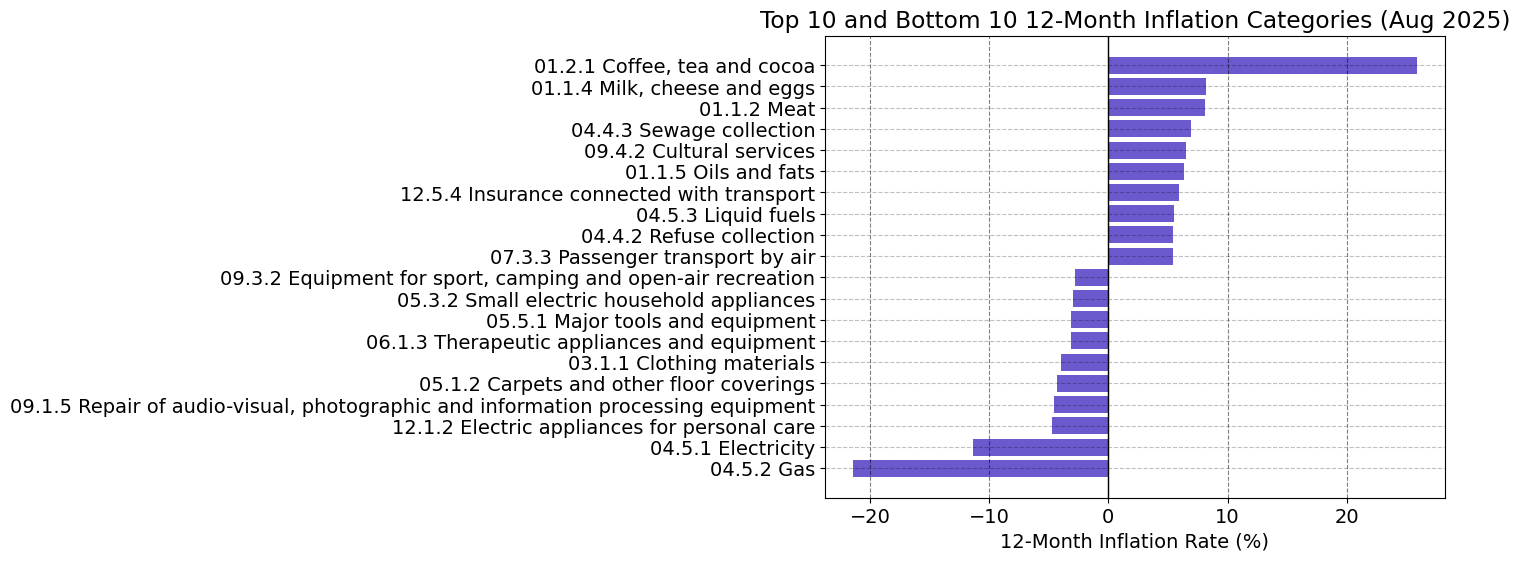

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
#Tag den her

# Get the latest month (should be Aug 2025)
latest_month = prices['date'].max()

# Extract 12-month inflation rates for that month
latest = (
    prices.loc[prices['date'] == latest_month, ['code3', 'name', 'infl_12m']]
    .dropna(subset=['infl_12m'])
)

# Rank categories by inflation
top10 = latest.nlargest(10, 'infl_12m')
bottom10 = latest.nsmallest(10, 'infl_12m')

# Combine and label for plotting
ranked = pd.concat([top10, bottom10])
ranked['category'] = ranked['code3'] + ' ' + ranked['name']

# Sort for plotting (lowest at bottom, highest at top)
ranked_sorted = ranked.sort_values('infl_12m')

# Bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(ranked_sorted['category'], ranked_sorted['infl_12m'], color='slateblue')
ax.axvline(0, color='black', linewidth=1)
ax.set_title('Top 10 and Bottom 10 12-Month Inflation Categories (Aug 2025)')
ax.set_xlabel('12-Month Inflation Rate (%)')
ax.grid(True, axis='x', alpha=0.5)
plt.tight_layout()
plt.show()


#I think this is it

In [23]:
import re

# Pull levels
levels = DstApi('PRIS111').variable_levels('VAREGR', language='en')

# Keep rows where the text starts with a 4-level code like 01.1.1.1 <name>
four_digit = levels[levels['text'].str.match(r'^\d{2}(?:\.\d){3}\s')].copy()

# Split into separate columns: code "01.1.1.1" and name "Rice"
four_digit[['code4d','name']] = four_digit['text'].str.extract(r'^(\d{2}(?:\.\d){3})\s+(.*)$')

print(f"Found {len(four_digit)} 4-digit categories")

# Create date column (1980M02 → 1980-02)
four_digit['date'] = pd.to_datetime(df['TID'].str.replace('M', '-'), format='%Y-%m', errors='coerce')

print(four_digit[['id','code4d','name','date']].head())


Found 222 4-digit categories
       id    code4d                      name date
4  011110  01.1.1.1                      Rice  NaT
5  011120  01.1.1.2  Flours and other cereals  NaT
6  011130  01.1.1.3                     Bread  NaT
7  011140  01.1.1.4     Other bakery products  NaT
8  011150  01.1.1.5          Pizza and quiche  NaT


In [24]:
import re
import pandas as pd

# Pull levels (metadata)
levels = DstApi('PRIS111').variable_levels('VAREGR', language='en').copy()

# Keep rows where text starts with a 3-segment code like "01.1.1 <name>"
mask = levels['text'].str.match(r'^\d{2}\.\d\.\d\s')
four_digit = levels.loc[mask].copy()

# Split into separate columns: code "01.1.1" and name
four_digit[['code3', 'name']] = four_digit['text'].str.extract(r'^(\d{2}\.\d\.\d)\s+(.*)$')

# (Optional) sanity check via ID shape:
# keep 6-digit IDs that end with '00' but NOT '0000' (e.g., 011100 kept, 010000 dropped)
id_mask = (
    four_digit['id'].str.match(r'^\d{6}$') &
    four_digit['id'].str.endswith('00') &
    ~four_digit['id'].str.endswith('0000')
)
four_digit = four_digit.loc[id_mask].copy()

print(f"Found {len(four_digit)} categories at the 01.1.1 level")
print(four_digit[['id', 'code3', 'name']].head())


Found 93 categories at the 01.1.1 level
        id   code3                   name
3   011100  01.1.1      Bread and cereals
12  011200  01.1.2                   Meat
20  011300  01.1.3       Fish and seafood
26  011400  01.1.4  Milk, cheese and eggs
33  011500  01.1.5          Oils and fats


In [25]:
# Example sketch (on your prices df)
prices = pris111[pris111['ENHED'] == 'Index'].copy()
prices['INDHOLD'] = pd.to_numeric(prices['INDHOLD'].astype(str).str.replace(',', '.'), errors='coerce')
prices['date'] = pd.to_datetime(prices['TID'].str.replace('M','-'), format='%Y-%m', errors='coerce')

# Extract parent 01.1.1 from VAREGR in the prices df
m = prices['VAREGR'].str.extract(r'^(?P<code3>\d{2}\.\d\.\d)(?:\.\d+)?\s+')
prices = prices.join(m).dropna(subset=['code3'])

# Attach canonical name/id from metadata
prices = prices.merge(four_digit[['id','code3','name']], on='code3', how='left')

#sort and print 

sorted_prices = prices.sort_values(by=['date', 'code3'])
print(sorted_prices[['date','code3','name','INDHOLD']].head())



          date   code3               name  INDHOLD
203 2001-01-01  01.1.1  Bread and cereals     67.6
204 2001-01-01  01.1.1  Bread and cereals      NaN
205 2001-01-01  01.1.1  Bread and cereals      NaN
206 2001-01-01  01.1.1  Bread and cereals      NaN
207 2001-01-01  01.1.1  Bread and cereals      NaN


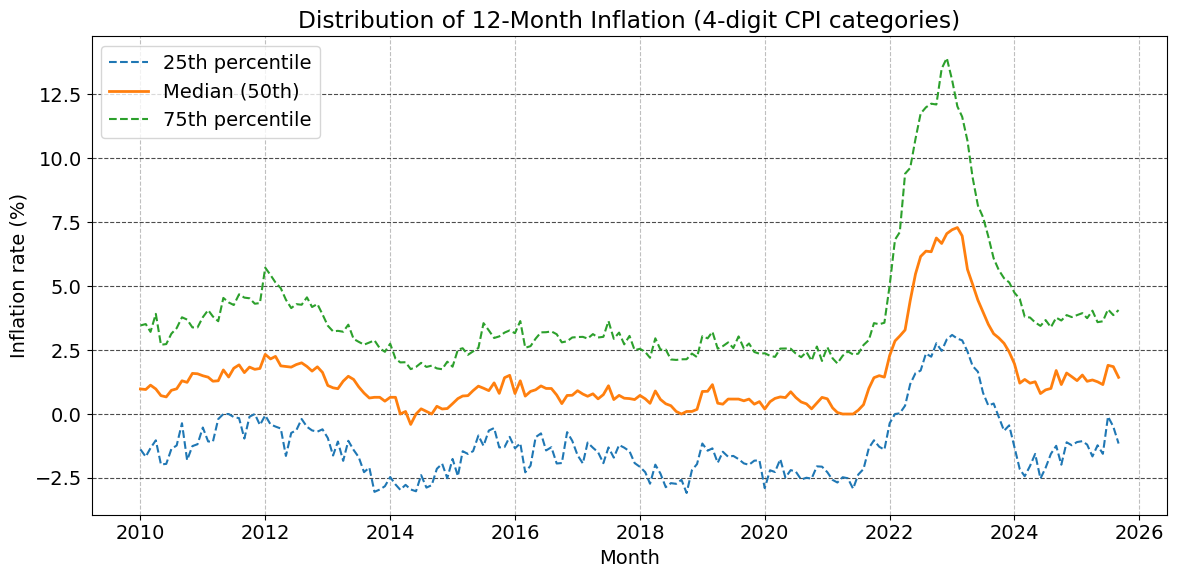

In [26]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# 1) Keep price *level* series and clean values
df = pris111[pris111['ENHED'] == 'Index'].copy()

# Replace ',' decimals if any, coerce '..' to NaN, parse dates
df['INDHOLD'] = pd.to_numeric(df['INDHOLD'].astype(str).str.replace(',', '.'), errors='coerce')
df['date'] = pd.to_datetime(df['TID'].str.replace('M', '-'), format='%Y-%m', errors='coerce')

# Drop rows without numeric value or date
df = df.dropna(subset=['INDHOLD', 'date'])

# 2) Extract 4-digit code and name from VAREGR (e.g. "05.3.2.3 Irons")
m = df['VAREGR'].str.extract(r'^(?P<code>\d{2}(?:\.\d){3})\s+(?P<name>.+)$')
df = df.join(m)

# Keep only true 4-digit categories
df = df[~df['code'].isna()].copy()

# 3) Sort properly
df = df.sort_values(['code', 'date'])

# 4) Compute 12-month (YoY) inflation per 4-digit category
df['infl_12m'] = df.groupby('code')['INDHOLD'].pct_change(12) * 100

# 5) Percentiles across 4-digit categories each month
summary = (
    df.groupby('date')['infl_12m']
      .agg(p25=lambda s: s.quantile(0.25),
           p50=lambda s: s.quantile(0.50),
           p75=lambda s: s.quantile(0.75))
      .reset_index()
)

# 6) Plot the distribution over time
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(summary['date'], summary['p25'], linestyle='--', label='25th percentile')
ax.plot(summary['date'], summary['p50'], linewidth=2, label='Median (50th)')
ax.plot(summary['date'], summary['p75'], linestyle='--', label='75th percentile')

ax.set_title('Distribution of 12-Month Inflation (4-digit CPI categories)')
ax.set_xlabel('Month')
ax.set_ylabel('Inflation rate (%)')
ax.legend()
ax.grid(True, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


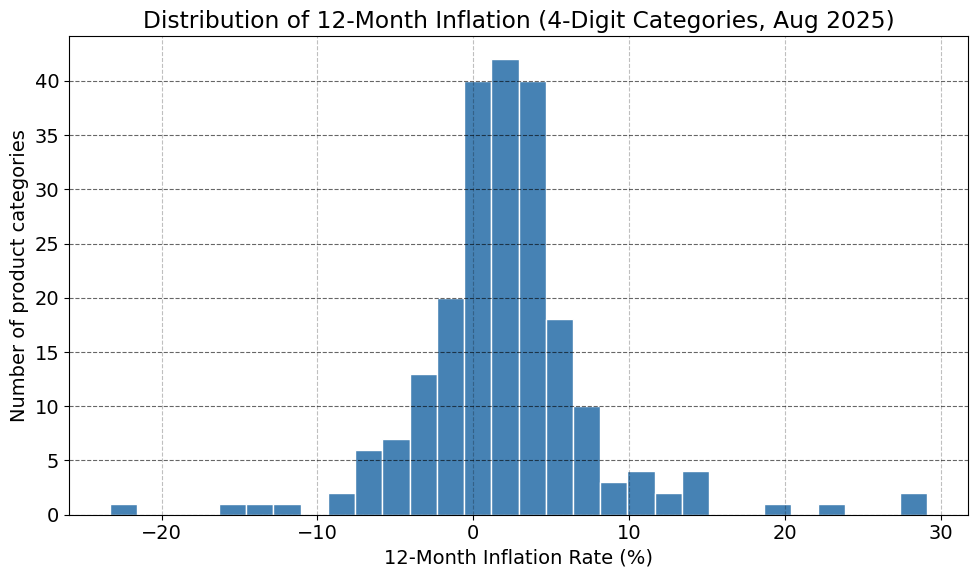

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Keep only Aug 2020 – Aug 2025
mask = (df['date'] >= '2020-08-01') & (df['date'] <= '2025-08-01')
df_period = df.loc[mask].copy()

# Get the latest available inflation per category within that window (Aug 2025)
latest = (
    df_period[df_period['date'] == df_period['date'].max()]
    [['code', 'name', 'infl_12m']]
    .dropna()
)

# Histogram
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(latest['infl_12m'], bins=30, color='steelblue', edgecolor='white')
ax.set_title('Distribution of 12-Month Inflation (4-Digit Categories, Aug 2025)')
ax.set_xlabel('12-Month Inflation Rate (%)')
ax.set_ylabel('Number of product categories')
ax.grid(True, axis='y', alpha=0.6)
plt.tight_layout()
plt.show()


Preview of final df before summarizing:

                                    VAREGR  ENHED      TID  INDHOLD  \
0                            01.1.1.1 Rice  Index  2009M01    133.4   
201      01.1.1.2 Flours and other cereals  Index  2009M01     84.0   
402                         01.1.1.3 Bread  Index  2009M01     94.6   
603         01.1.1.4 Other bakery products  Index  2009M01     83.2   
804              01.1.1.5 Pizza and quiche  Index  2009M01    104.1   
1005  01.1.1.6 Pasta products and couscous  Index  2009M01    101.7   
1206            01.1.1.7 Breakfast cereals  Index  2009M01     92.6   
1407        01.1.1.8 Other cereal products  Index  2009M01     84.0   
1                            01.1.1.1 Rice  Index  2009M02    133.4   
202      01.1.1.2 Flours and other cereals  Index  2009M02     84.0   

           date      code                         name  infl_12m   code3  \
0    2009-01-01  01.1.1.1                         Rice       NaN  01.1.1   
201  2009-01-01  01.1.1.2

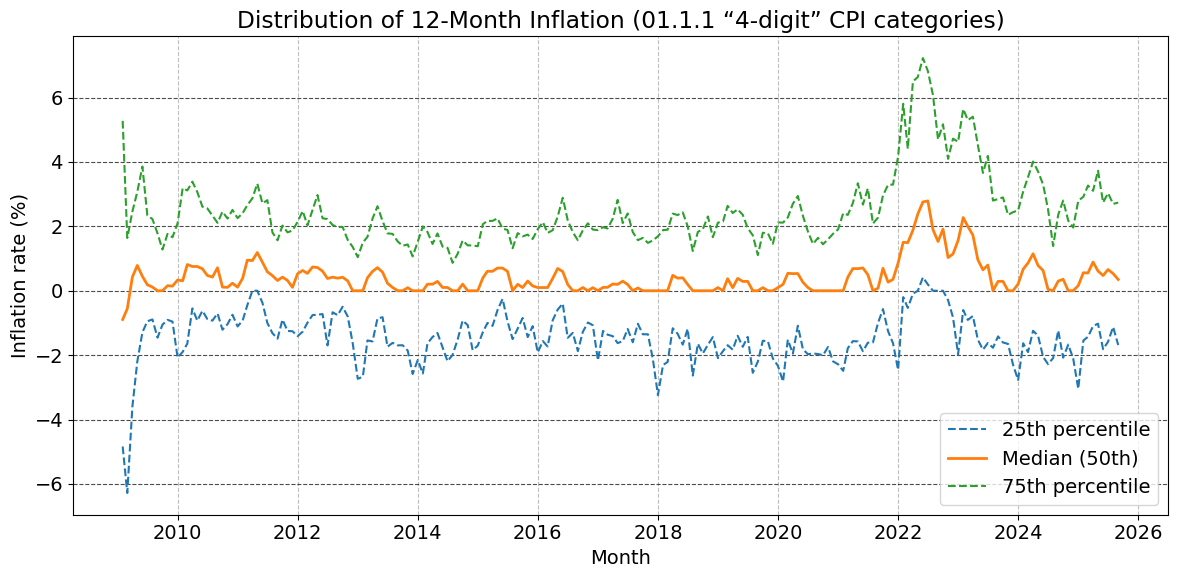

In [28]:

import re
import pandas as pd
import matplotlib.pyplot as plt

# --- (A) Optional: get clean names for the 01.1.1 level from DST metadata ---
levels = DstApi('PRIS111').variable_levels('VAREGR', language='en').copy()

# Keep only 01.1.1-style rows (three segments) and split code + name
mask_3seg = levels['text'].str.match(r'^\d{2}\.\d\.\d\s')
names_3seg = levels.loc[mask_3seg, ['text']].copy()
names_3seg[['code3', 'name3']] = names_3seg['text'].str.extract(r'^(\d{2}\.\d\.\d)\s+(.*)$')
names_3seg = names_3seg[['code3', 'name3']].drop_duplicates()

# --- (B) Prepare CPI time series (same as your steps, but target 3 segments) ---
# 1) Keep price *level* series and clean values
df['INDHOLD'] = pd.to_numeric(df['INDHOLD'].astype(str).str.replace(',', '.'), errors='coerce')
df['date'] = pd.to_datetime(df['TID'].str.replace('M', '-'), format='%Y-%m', errors='coerce')

# Drop rows without numeric value or date
df = df.dropna(subset=['INDHOLD', 'date'])

# 2) Extract the 3-segment "4-digit" code from VAREGR (01.1.1 level)
m = df['VAREGR'].str.extract(r'^(?P<code3>\d{2}\.\d\.\d)(?:\.\d+)?\s+(?P<rest>.+)$')
df = df.join(m)

# Keep only true 01.1.1-level mappings
df = df[~df['code3'].isna()].copy()

# Optional: attach canonical name from metadata
df = df.merge(names_3seg, on='code3', how='left')

# 3) Sort properly
df = df.sort_values(['code3', 'date'])

# 4) Compute 12-month (YoY) inflation per 01.1.1 category
df['infl_12m'] = df.groupby('code3')['INDHOLD'].pct_change(12) * 100

# 👇 Add this line to inspect what your data looks like
print("Preview of final df before summarizing:\n")
print(df.head(10))

# 5) Percentiles across 01.1.1 categories each month
summary = (
    df.groupby('date')['infl_12m']
      .agg(p25=lambda s: s.quantile(0.25),
           p50=lambda s: s.quantile(0.50),
           p75=lambda s: s.quantile(0.75))
      .reset_index()
)

# 6) Plot the distribution over time
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(summary['date'], summary['p25'], linestyle='--', label='25th percentile')
ax.plot(summary['date'], summary['p50'], linewidth=2, label='Median (50th)')
ax.plot(summary['date'], summary['p75'], linestyle='--', label='75th percentile')

ax.set_title('Distribution of 12-Month Inflation (01.1.1 “4-digit” CPI categories)')
ax.set_xlabel('Month')
ax.set_ylabel('Inflation rate (%)')
ax.legend()
ax.grid(True, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\madsj\AppData\Local\Temp\ipykernel_22184\2106739194.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


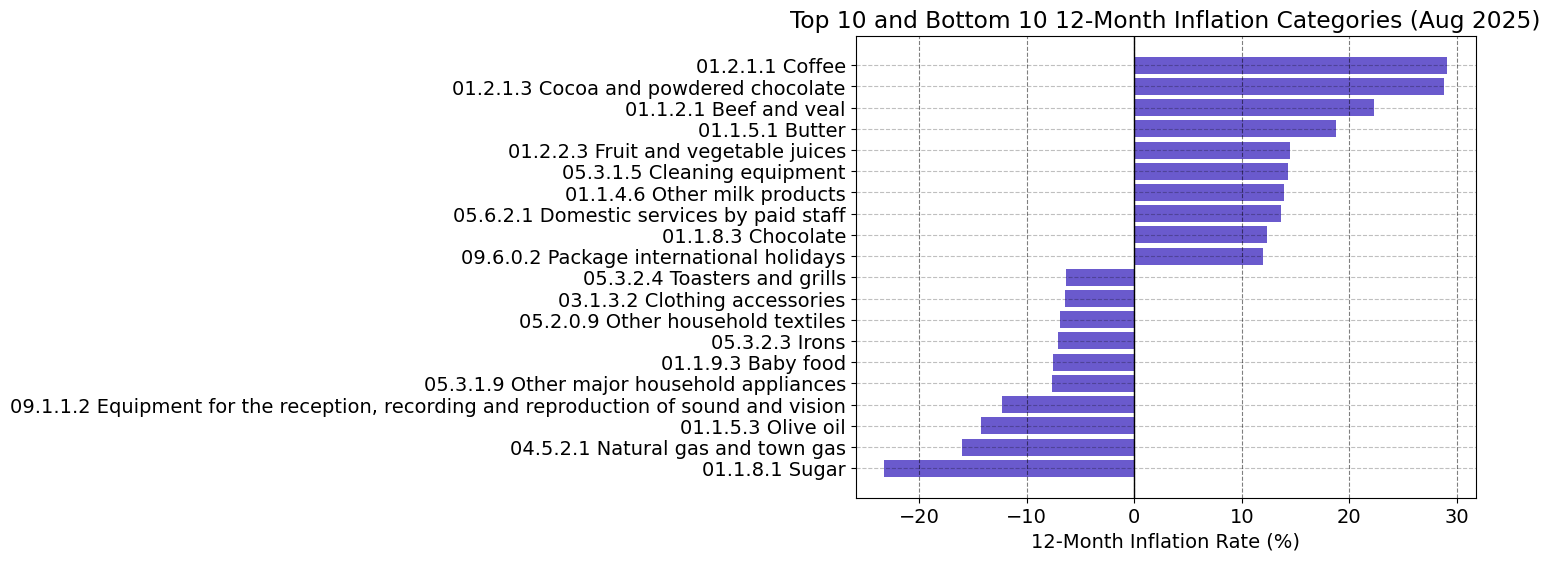

In [29]:
# Rank categories by their Aug 2025 12-month inflation
top10 = latest.nlargest(10, 'infl_12m')
bottom10 = latest.nsmallest(10, 'infl_12m')

# Combine for plotting
ranked = pd.concat([top10, bottom10])
ranked['category'] = ranked['code'] + ' ' + ranked['name']

# Bar chart
fig, ax = plt.subplots(figsize=(8,6))
ranked_sorted = ranked.sort_values('infl_12m')
ax.barh(ranked_sorted['category'], ranked_sorted['infl_12m'], color='slateblue')
ax.axvline(0, color='black', linewidth=1)
ax.set_title('Top 10 and Bottom 10 12-Month Inflation Categories (Aug 2025)')
ax.set_xlabel('12-Month Inflation Rate (%)')
ax.grid(True, axis='x', alpha=0.5)
plt.tight_layout()
plt.show()
